Vamos a comenzar estableciendo una puntuación en función de las derrotas, victorias y empates teniendo en cuenta la ronda en la que estamos, siendo la fase de grupos la menor ponerada:

Fase de Grupos = Puntos * 0.5 RO16 = Puntos * 0.6 RO8 = Puntos * 0.7 RO4 = Puntos * 0.8 SF = Puntos * 0.9 F = Puntos * 1

Dando 3 puntos por victoria, 1 por empate y -1 por derrota

In [2]:
import pandas as pd

def calcular_puntuacion(datos):
    puntuacion_total = {}

    for archivo in datos:
        df = pd.read_csv(archivo)
        for index, row in df.iterrows():
            home_team = row['Home Team']
            home_goals = row['Home Goals']
            away_goals = row['Away Goals']
            away_team = row['Away Team']
            round_number = row['Round Number']

            # Calcular puntos según el resultado
            if home_goals > away_goals:
                puntuacion_local = 3
                puntuacion_visitante = -1
            elif home_goals < away_goals:
                puntuacion_local = -1
                puntuacion_visitante = 3
            else:
                puntuacion_local = 1
                puntuacion_visitante = 1

            # Calcular puntuación ponderada según la ronda
            if round_number == 'Fase de Grupos':
                factor = 0.5
            elif round_number == 'RO16':
                factor = 0.6
            elif round_number == 'RO8':
                factor = 0.7
            elif round_number == 'RO4':
                factor = 0.8
            elif round_number == 'SF':
                factor = 0.9
            else:  # Final
                factor = 1

            # Actualizar puntuación total para el equipo local
            if home_team in puntuacion_total:
                puntuacion_total[home_team] += puntuacion_local * factor
            else:
                puntuacion_total[home_team] = puntuacion_local * factor

            # Actualizar puntuación total para el equipo visitante
            if away_team in puntuacion_total:
                puntuacion_total[away_team] += puntuacion_visitante * factor
            else:
                puntuacion_total[away_team] = puntuacion_visitante * factor

    # Convertir el diccionario de puntuaciones totales a DataFrame
    df_puntuacion = pd.DataFrame(puntuacion_total.items(), columns=['Equipo', 'Puntos'])

    return df_puntuacion

# Cargar los datos de los archivos CSV
archivos = [
    "Datos_Limpios/UCL2014-2015.csv",
    "Datos_Limpios/UCL2015-2016.csv",
    "Datos_Limpios/UCL2016-2017.csv",
    "Datos_Limpios/UCL2017-2018.csv",
    "Datos_Limpios/UCL2018-2019.csv",
    "Datos_Limpios/UCL2019-2020.csv",
    "Datos_Limpios/UCL2020-2021.csv",
    "Datos_Limpios/UCL2021-2022.csv",
    "Datos_Limpios/UCL2022-2023.csv"
]

# Calcular la puntuación total
puntuacion_total = calcular_puntuacion(archivos)

# Ordenarlo de mayor a menor puntuación

puntuacion_total = puntuacion_total.sort_values(by='Puntos', ascending=False)

# Mostrar los 5 primeros equipos

print(puntuacion_total.head(5))

# Guardar la puntuación total en un archivo CSV
puntuacion_total.to_csv("Datos_Limpios/Puntaje.csv", index=False)

                 Equipo  Puntos
19        Bayern Munich     204
0           Real Madrid     195
22         FC Barcelona     188
18      Manchester City     175
20  Paris Saint-Germain     162


Ahora de la tabla Datos/UEFA_Ranking.csv vamos a tomar los valores de los equipos que han salido en la tabla Puntaje.csv

In [3]:

# Cargar los datos de los archivos CSV
ranking = pd.read_csv("Datos/UEFA_Ranking.csv")
puntuacion = pd.read_csv("Datos_Limpios/Puntaje.csv")

# Unir solamente la columna Total Points y Unnamed: 2_level_0 con la tabla Puntaje.csv

ranking = ranking[['Unnamed: 2_level_0', 'Total Points']]
puntuacion = puntuacion[['Equipo', 'Puntos']]

# Unir las tablas

tabla_final = pd.merge(ranking, puntuacion, left_on='Unnamed: 2_level_0', right_on='Equipo')

# Eliminar la columna Unnamed: 2_level_0

tabla_final = tabla_final.drop(columns=['Unnamed: 2_level_0'])

# Pongo las columnas en este orden: Equipo, Puntuacion Total, Total Points

tabla_final = tabla_final[['Equipo', 'Puntos', 'Total Points']]

# Cambio el nombre de Total Points a Puntuacion UEFA

tabla_final = tabla_final.rename(columns={'Total Points': 'Puntuacion UEFA'})

# Sumar ambos puntajes en una nueva columna llamada Puntuacion Ponderada

tabla_final['Puntuacion Ponderada'] = tabla_final['Puntos'] + tabla_final['Puntuacion UEFA']

# Ordenar la tabla de mayor a menor puntuación ponderada

tabla_final = tabla_final.sort_values(by='Puntuacion Ponderada', ascending=False)

# Guardar la tabla final en un archivo CSV

tabla_final.to_csv("Datos_Limpios/Puntaje_Ponderado.csv", index=False)

print(tabla_final)

                      Equipo  Puntos  Puntuacion UEFA  Puntuacion Ponderada
0                Real Madrid     195            363.0                 558.0
1               FC Barcelona     188            264.0                 452.0
2            Manchester City     175            260.0                 435.0
5        Paris Saint-Germain     162            213.0                 375.0
3                  Liverpool     105            234.0                 339.0
4                   Juventus     118            221.0                 339.0
6                    Chelsea     115            210.0                 325.0
9                   FC Porto      98            184.0                 282.0
10         Borussia Dortmund      69            179.0                 248.0
8          Manchester United      49            193.0                 242.0
7                    Sevilla      37            204.0                 241.0
13                    Napoli      67            160.0                 227.0
12          

### Comenzamos con las gráficas:

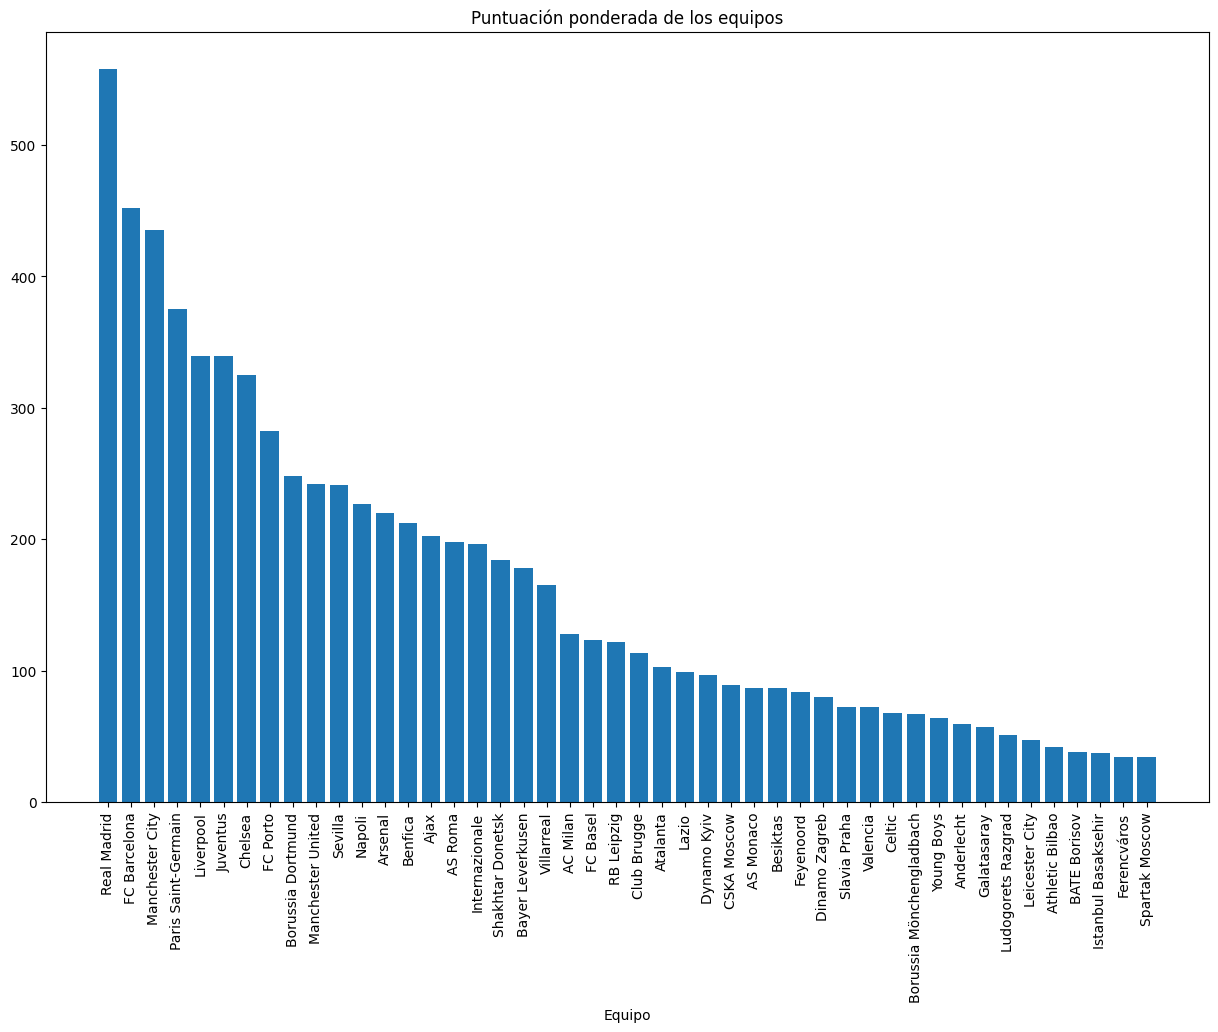

In [4]:
# Primero un gráfico de barras con la puntuación ponderada de los equipos

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(tabla_final['Equipo'], tabla_final['Puntuacion Ponderada'])
ax.set_title('Puntuación ponderada de los equipos')
ax.set_xlabel('Equipo')

plt.xticks(rotation=90)
plt.show()

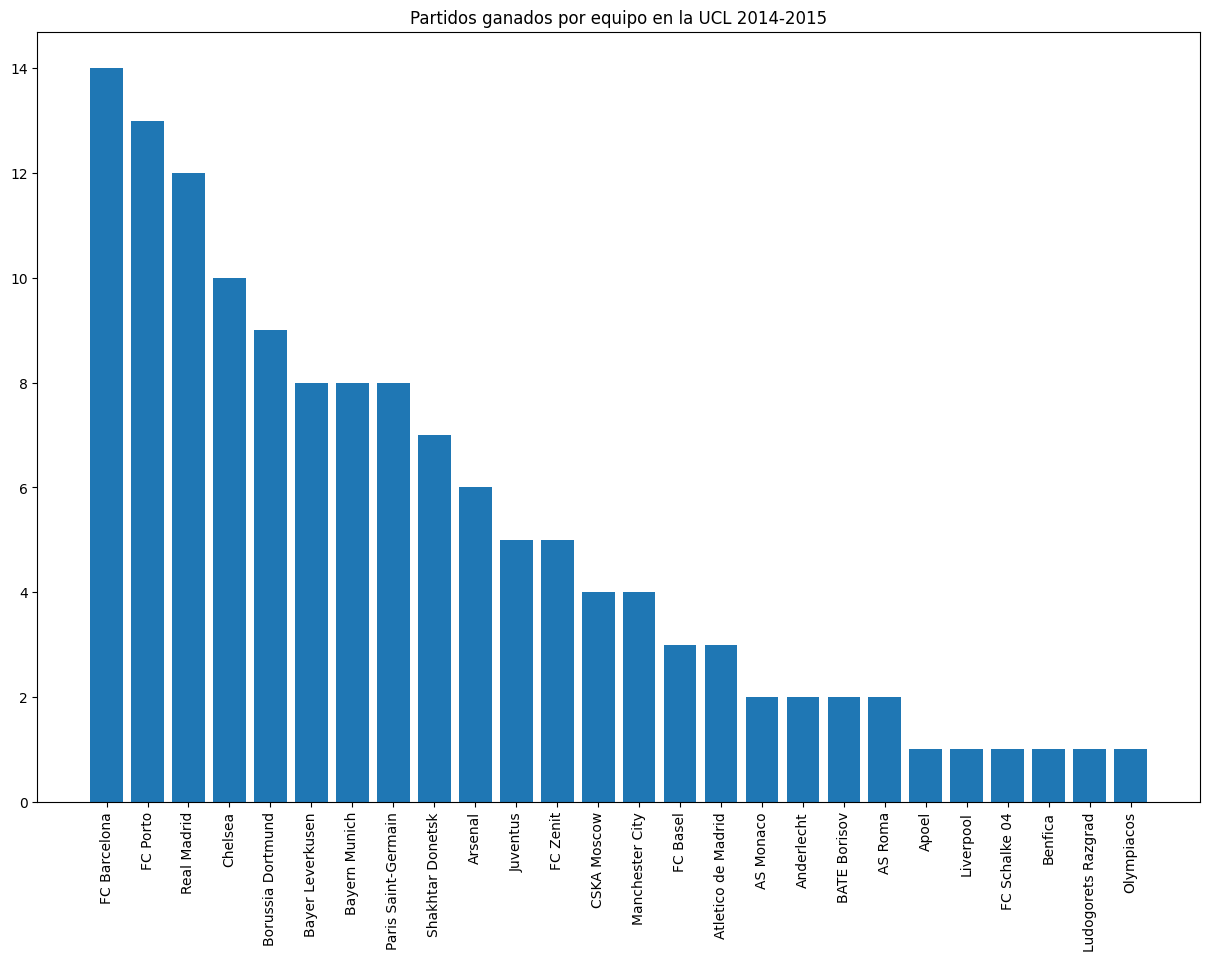

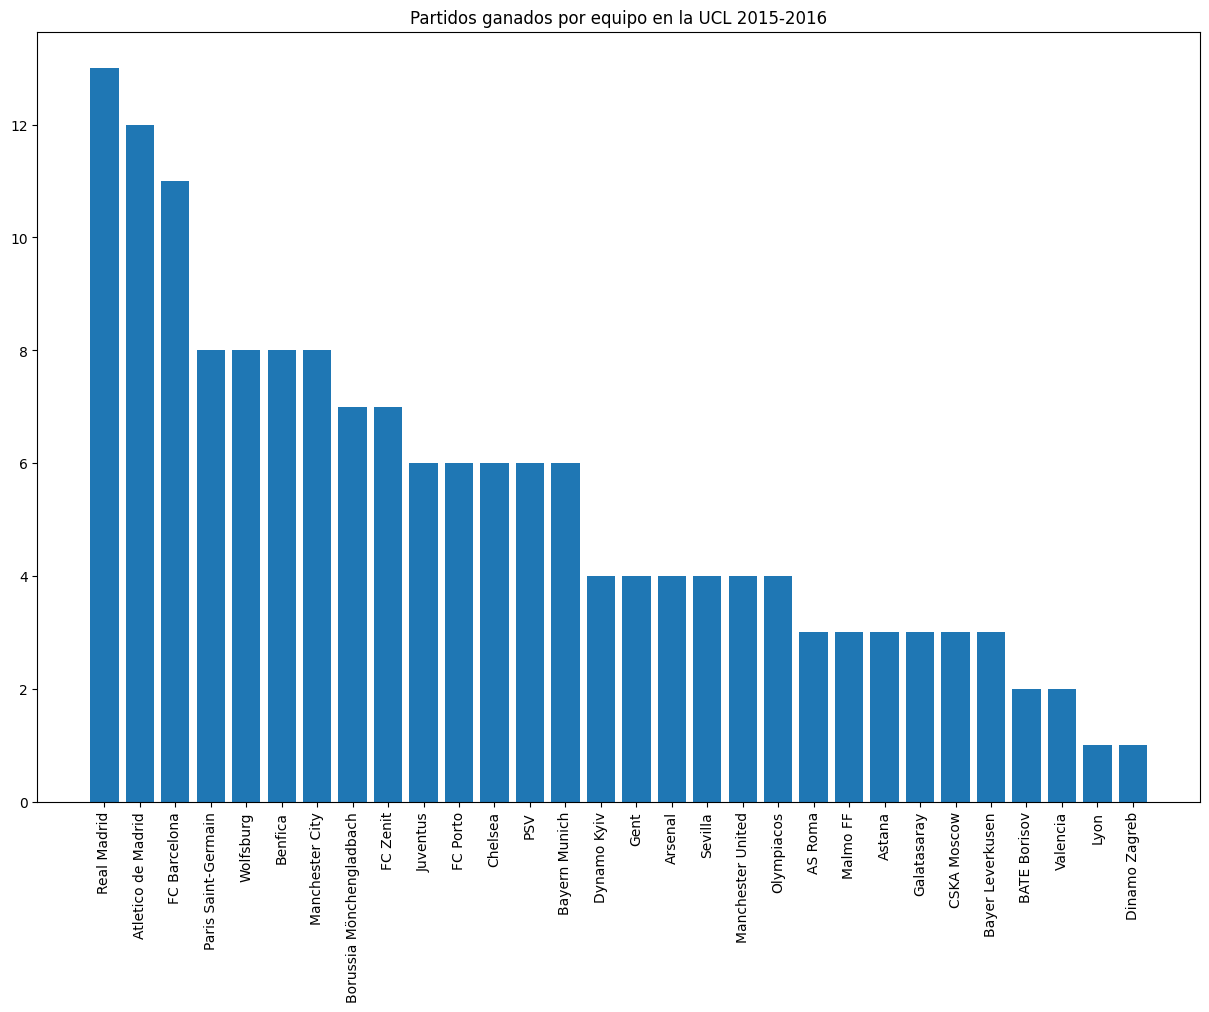

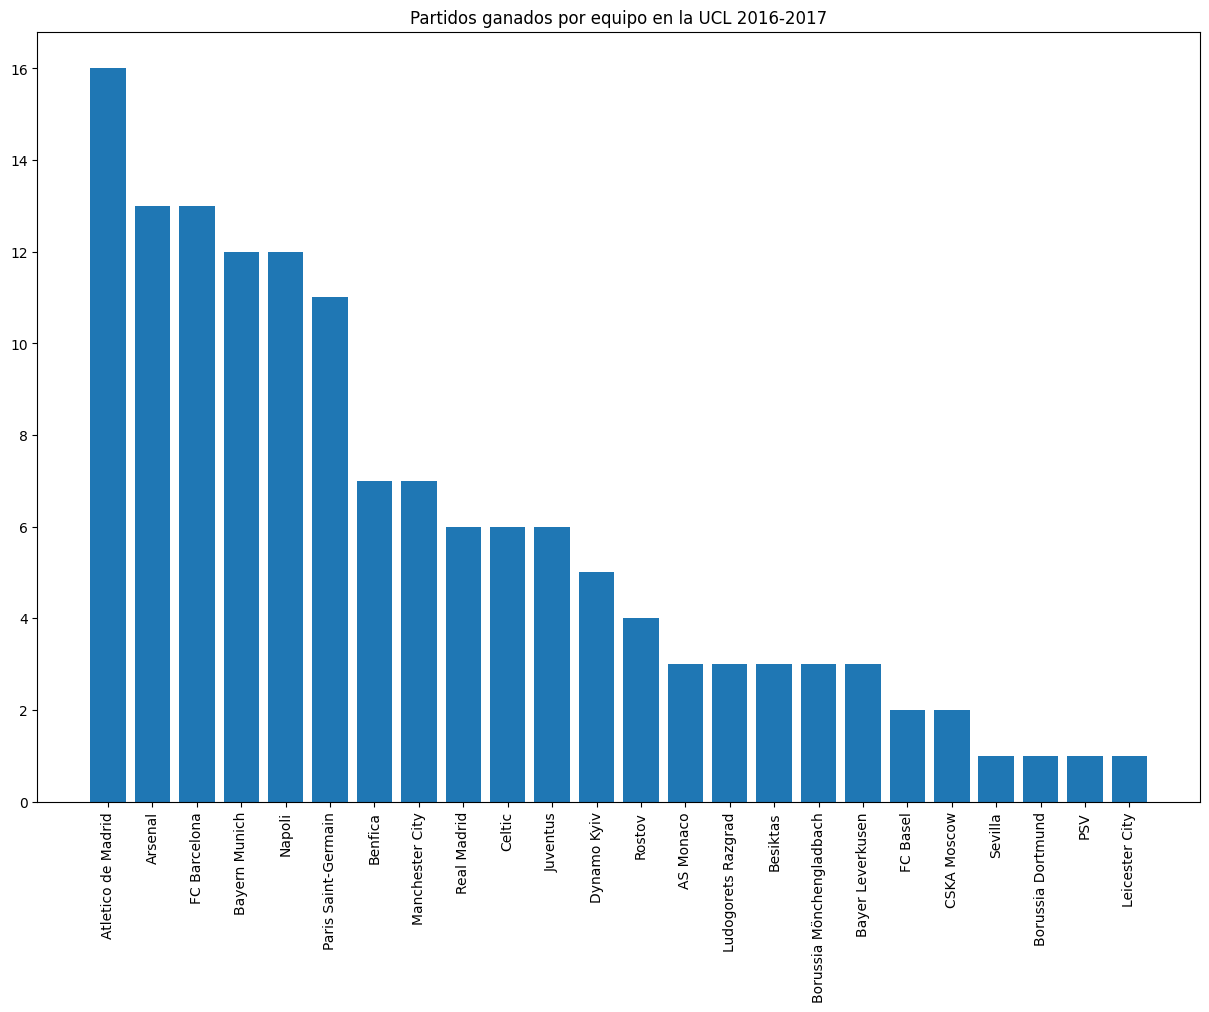

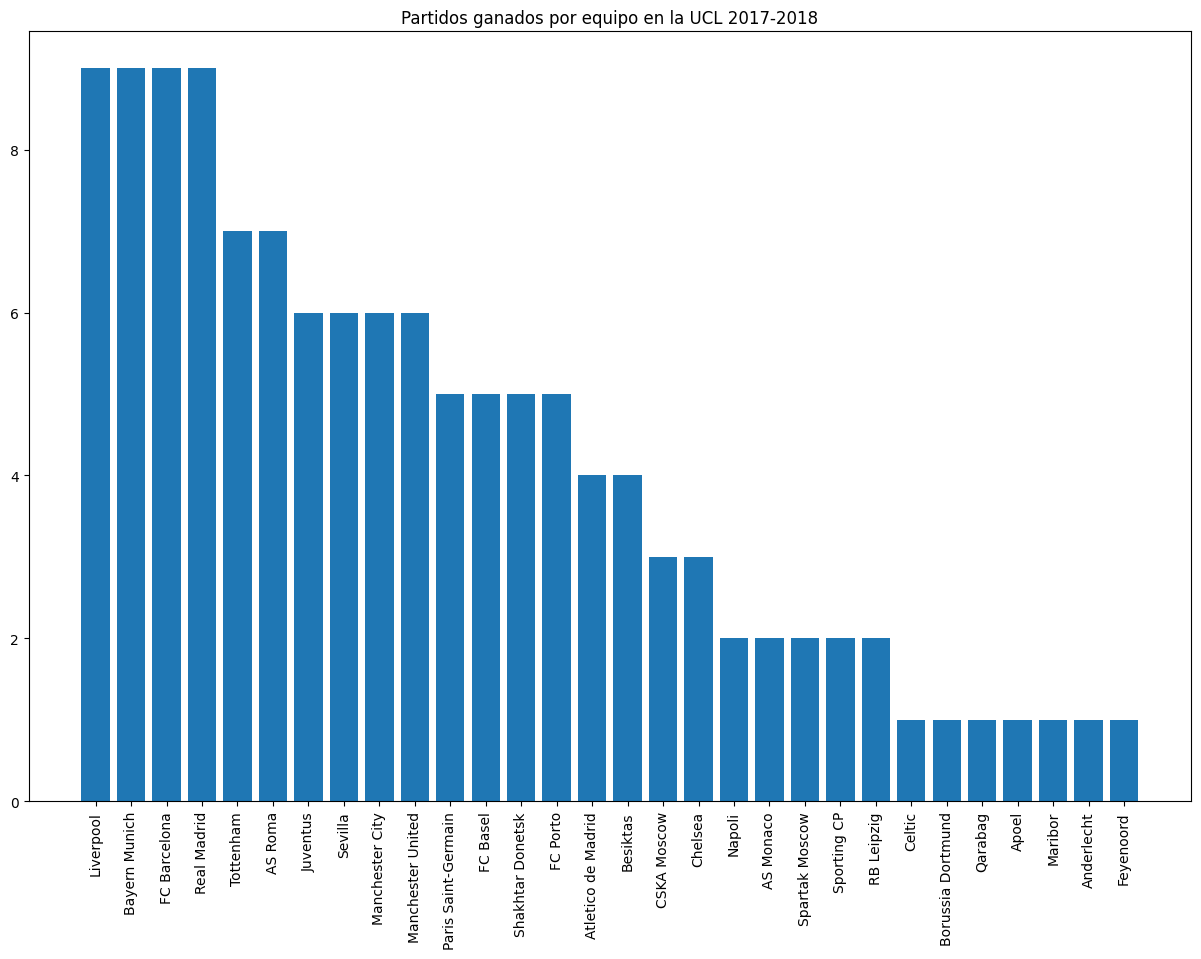

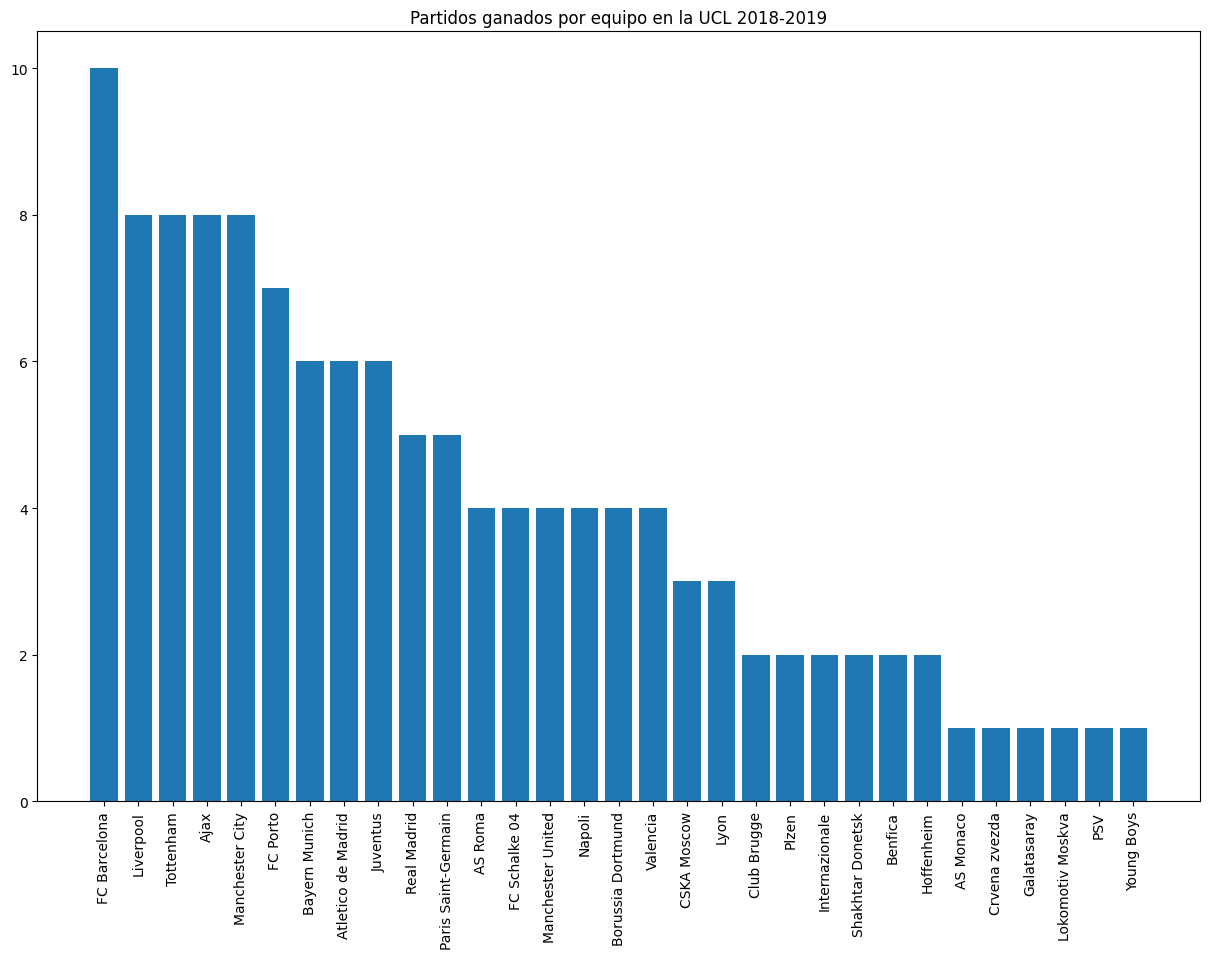

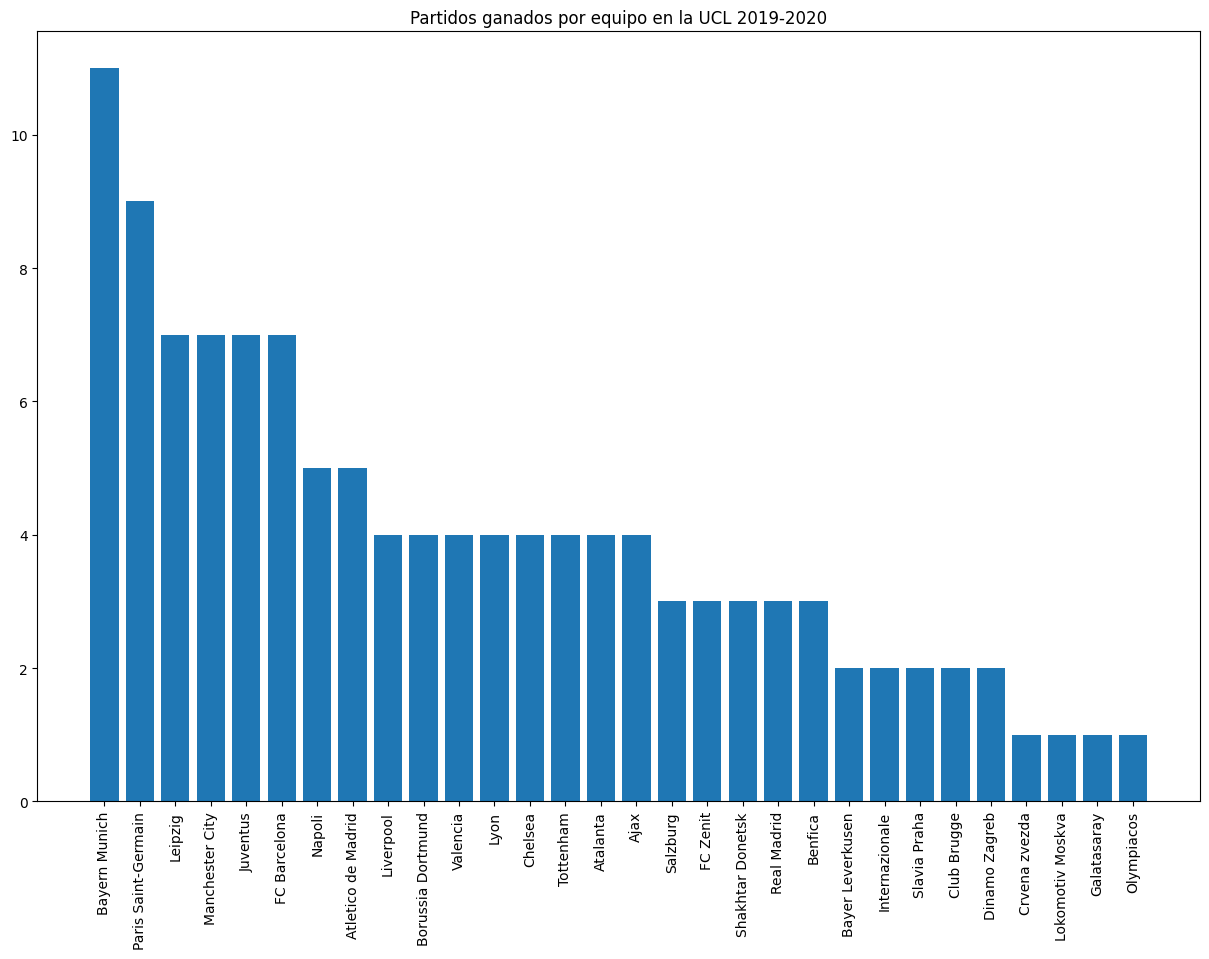

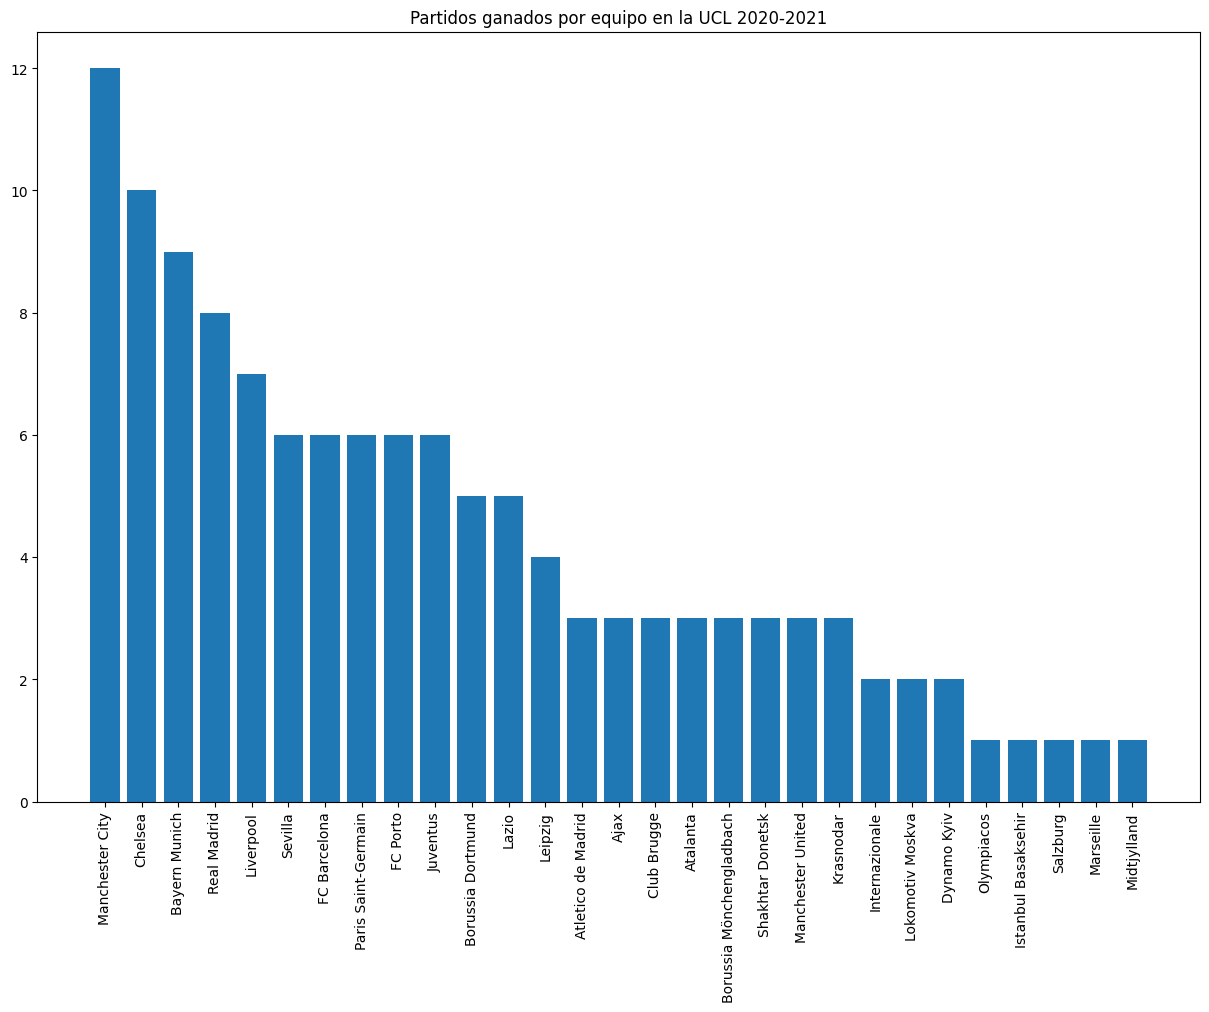

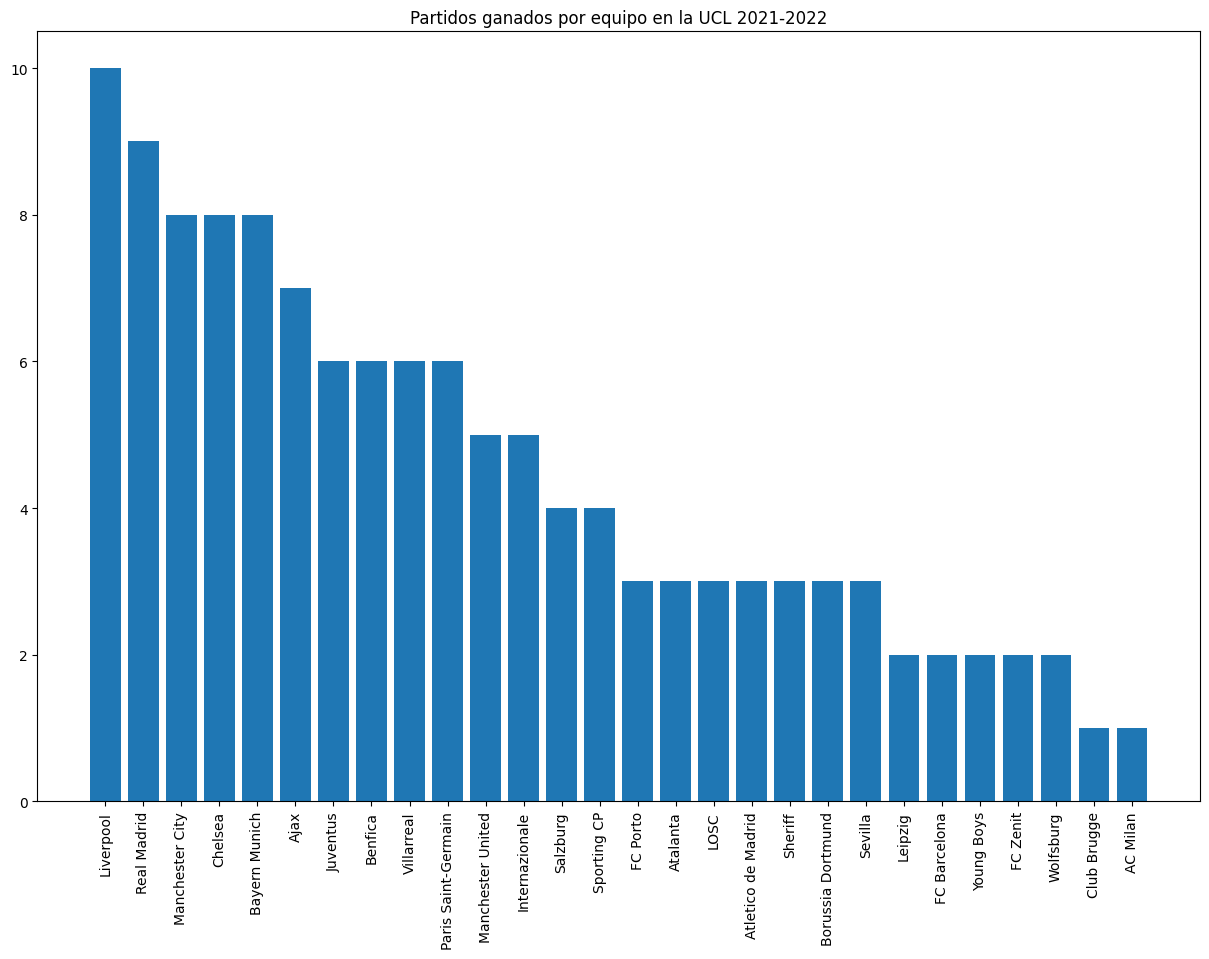

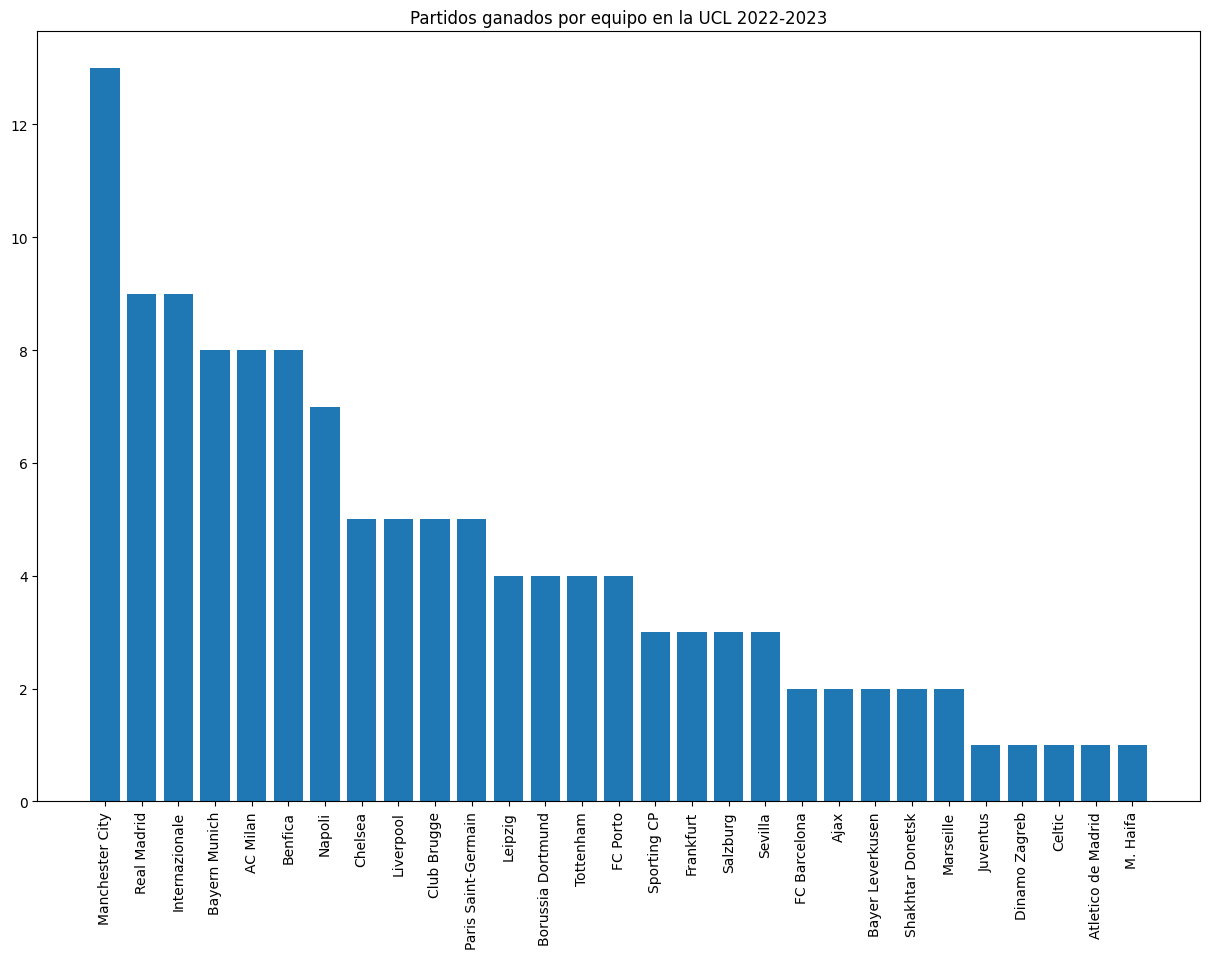

In [5]:
# Gráfico de las champions 2014-2023

datos= ["Datos_Limpios/UCL2014-2015.csv", "Datos_Limpios/UCL2015-2016.csv", "Datos_Limpios/UCL2016-2017.csv", "Datos_Limpios/UCL2017-2018.csv", "Datos_Limpios/UCL2018-2019.csv", "Datos_Limpios/UCL2019-2020.csv", "Datos_Limpios/UCL2020-2021.csv", "Datos_Limpios/UCL2021-2022.csv", "Datos_Limpios/UCL2022-2023.csv"]

for i in range(len(datos)):

    df = pd.read_csv(datos[i])

    # Crear una columna con el nombre del ganador de cada partido

    df['Ganador'] = df.apply(lambda row: row['Home Team'] if row['Home Goals'] > row['Away Goals'] else row['Away Team'], axis=1)

    # Contar cuántos partidos ganó cada equipo

    ganados = df['Ganador'].value_counts()

    # Crear un gráfico de barras con los partidos ganados por cada equipo

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.bar(ganados.index, ganados)

    ax.set_title('Partidos ganados por equipo en la UCL ' + str(2014 + i) + '-' + str(2015 + i))

    plt.xticks(rotation=90)

    plt.show()


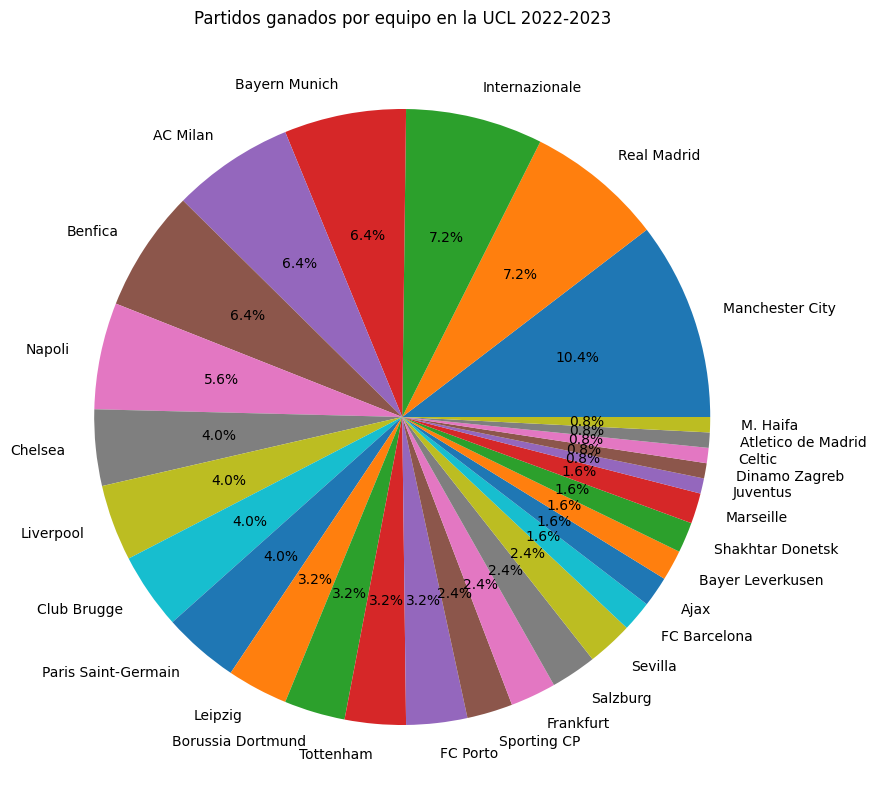

In [6]:
# Gráfico circular

# Crear una columna con el nombre del ganador de cada partido

df['Ganador'] = df.apply(lambda row: row['Home Team'] if row['Home Goals'] > row['Away Goals'] else row['Away Team'], axis=1)

# Contar cuántos partidos ganó cada equipo

ganados = df['Ganador'].value_counts()

# Crear un gráfico circular con los partidos ganados por cada equipo

fig, ax = plt.subplots(figsize=(15, 10))

ax.pie(ganados, labels=ganados.index, autopct='%1.1f%%')

ax.set_title('Partidos ganados por equipo en la UCL 2022-2023')

plt.show()

### Ahora vamos con la Regresión Lineal

Coeficiente de determinación: 0.801617595077943
Pendiente: [[1.22887552]]
Intercepto: [74.97503073]


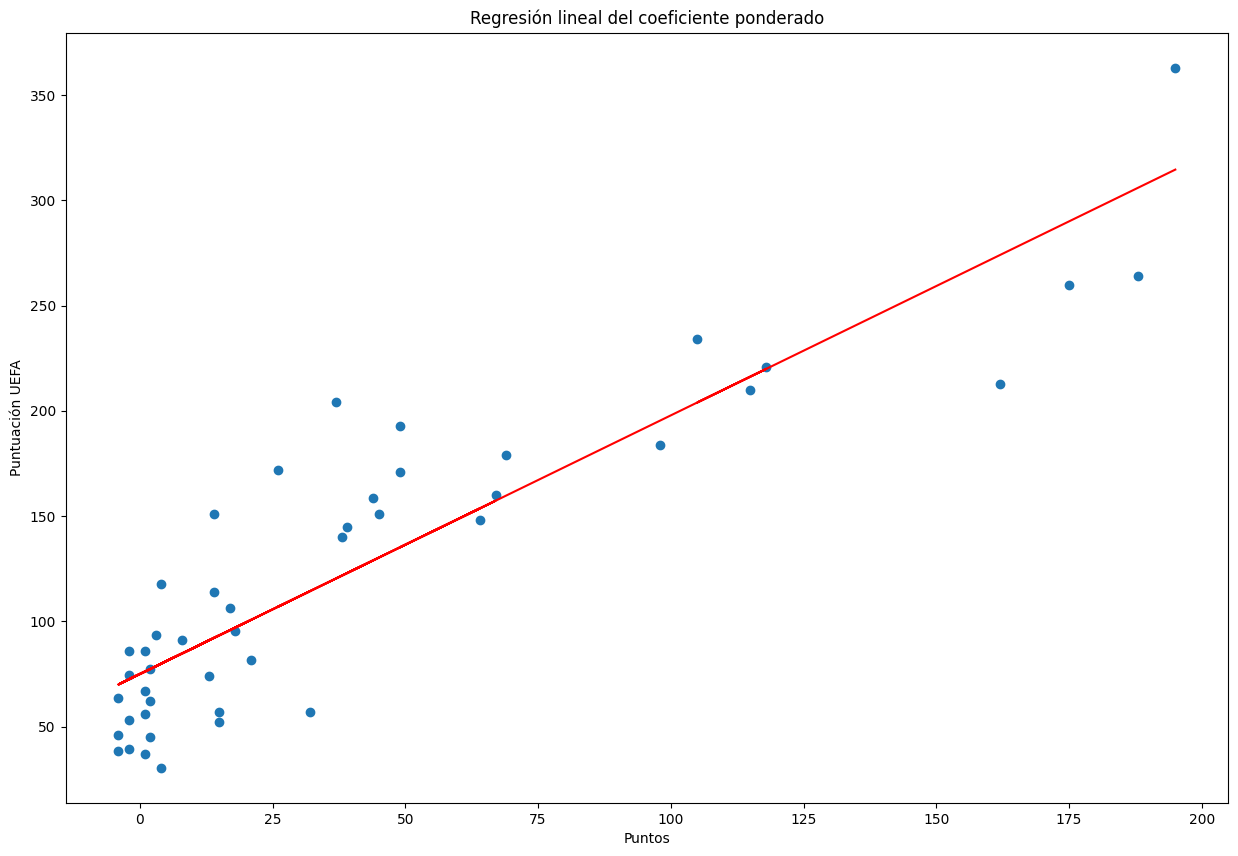

In [8]:
from sklearn.linear_model import LinearRegression

X = tabla_final['Puntos'].values.reshape(-1, 1)

y = tabla_final['Puntuacion UEFA'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

print('Coeficiente de determinación:', reg.score(X, y))

print('Pendiente:', reg.coef_)

print('Intercepto:', reg.intercept_)

# Crear un gráfico de dispersión con la regresión lineal

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(tabla_final['Puntos'], tabla_final['Puntuacion UEFA'])

ax.plot(X, reg.predict(X), color='red')

ax.set_title('Regresión lineal del coeficiente ponderado')

ax.set_xlabel('Puntos')

ax.set_ylabel('Puntuación UEFA')

plt.show()